## Overview of results for September - November 2012

As demonstrated in the _Results Plots Walkthrough_ notebook, we can load publically-available data to reproduce the results. In order to reduce clutter, this one is specifically for September - November 2012. 

In [1]:
# Set up our notebook environment.

% matplotlib inline
import matplotlib as mpl
import numpy as np
import pandas as pd

import sys
sys.path.append('../')

import os

# For interacting with the flask-mongoengine ODM. TODO: necessary?
os.environ['CONFIG_FILE'] = 'conf/default.cfg'

# This directory is in the .gitignore
SAVE_DIR = 'Figures'
if not os.path.isdir(SAVE_DIR):
    os.mkdir(SAVE_DIR)
    
from projects.common import get_project_data_frame
# TODO: incorporate this fit_all_networks into projects.common
from viomet_9_10_17 import (
    fit_all_networks, by_network_frequency_figure,
    subject_object_analysis, by_facet_word
)

In [4]:
# Fetch the processed .csv from metacorps.io and inspect the dataframe.
metaphors_url = \
    'http://metacorps.io/static/data/viomet-2012-snapshot-project-df.csv'
viomet_df = get_project_data_frame(metaphors_url)
viomet_df.head()

,start_localtime,start_time,stop_time,runtime_seconds,network,program_name,iatv_id,facet_word,conceptual_metaphor,spoken_by,subjects,objects,active_passive,text,tense,repeat,repeat_index
0,2012-11-15 23:00:00,2012-11-16 07:00:00,2012-11-16 08:00:01,3601.0,MSNBCW,Hardball With Chris Matthews,MSNBCW_20121116_070000_Hardball_With_Chris_Mat...,hit,political act is a physical attack,NaN,Barack Obama,John McCain,active,"WELCOME BACK TO ""HARDBALL."" JOHN McCAIN AND HI...",past,False,NaN
1,2012-11-15 23:00:00,2012-11-16 07:00:00,2012-11-16 08:00:01,3601.0,MSNBCW,Hardball With Chris Matthews,MSNBCW_20121116_070000_Hardball_With_Chris_Mat...,hit,politics is a fight,NaN,investigators,David Petraeus,active,I'M SERIOUS. I'M THINKING OF ALL THE POLITIC...,future,False,NaN
2,2012-10-05 19:00:00,2012-10-06 02:00:00,2012-10-06 03:00:01,3601.0,MSNBCW,Hardball With Chris Matthews,MSNBCW_20121006_020000_Hardball_With_Chris_Mat...,hit,progression in time is a physical impact,NaN,we,point in time,passive,WE HAVE HIT THE POINT IN THE ELECTION WHERE ...,present,False,NaN
3,2012-10-05 19:00:00,2012-10-06 02:00:00,2012-10-06 03:00:01,3601.0,MSNBCW,Hardball With Chris Matthews,MSNBCW_20121006_020000_Hardball_With_Chris_Mat...,hit,financial loss as physical attack,NaN,Romney's Health Care Plan,Possiblities for insurance coverage,active,I JUST PUT TOGETHER SOME NUMBERS ON THIS IN ...,future,False,NaN
4,2012-09-18 23:00:00,2012-09-19 06:00:00,2012-09-19 07:00:01,3601.0,MSNBCW,Hardball With Chris Matthews,MSNBCW_20120919_060000_Hardball_With_Chris_Mat...,hit,presidential election is a fight,NaN,something Romney said,Mitt Romney,active,I DON'T THINK THIS IS GOING TO BE A BIG POLI...,future,False,NaN


In [5]:
date_range = pd.date_range('2012-9-1', '2012-11-30', freq='D')
# Run modeling fits to determine the first and last date of the 
# excited state for each of the three networks MSNBC, CNN, and Fox News.
IATV_CORPUS_NAME = 'Viomet Sep-Nov 2012'
fit_networks = fit_all_networks(
    viomet_df,
    date_range=date_range,
    iatv_corpus_name=IATV_CORPUS_NAME  # TODO: why is this here?
)
# Fit a model to the aggregation over 
# agg = 

In [6]:
fit_networks

{'CNNW': (<projects.viomet.analysis.PartitionInfo at 0x10518f240>,
  AIC                                                      38.0484
  coef                   [2.2000000000000046, -1.1180327868852522]
  first_date                                   2012-10-04 00:00:00
  model          [[2.2000000000000046, -1.1180327868852522], [3...
  second_date                                  2012-10-17 00:00:00
  Name: 540, dtype: object),
 'FOXNEWSW': (<projects.viomet.analysis.PartitionInfo at 0x10529fd68>,
  AIC                                                      85.5142
  coef                    [2.600000000000001, -0.8000000000000013]
  first_date                                   2012-09-30 00:00:00
  model          [[2.600000000000001, -0.8000000000000013], [2....
  second_date                                  2012-10-23 00:00:00
  Name: 426, dtype: object),
 'MSNBCW': (<projects.viomet.analysis.PartitionInfo at 0x1005f4e10>,
  AIC                                                       80.42

In [7]:
# The fit_networks dictionary printed above
# contains more information than we need
# at this time. Here we extract what we do need.
partition_infos = {network: fit_networks[network][0]
                   for network in ['MSNBCW', 'CNNW', 'FOXNEWSW']}

by_network_frequency_figure(
    viomet_df, date_range=date_range,
    iatv_corpus_name=IATV_CORPUS_NAME,
    partition_infos=partition_infos,
    save_path='Figures/model_fits_2012.pdf'
)

from IPython.display import IFrame
IFrame('Figures/model_fits_2012.pdf', width=600, height=450)

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


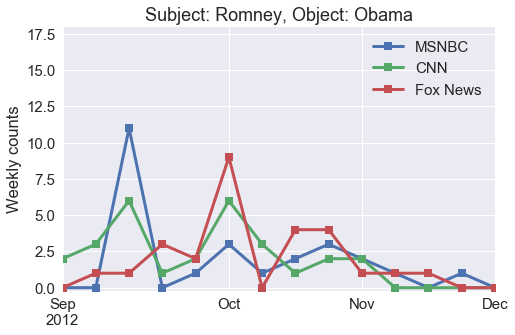

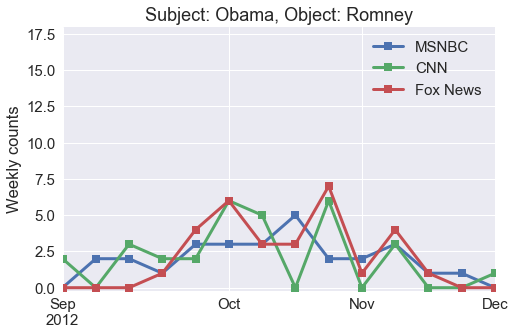

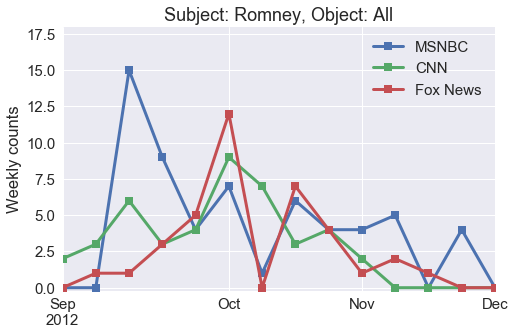

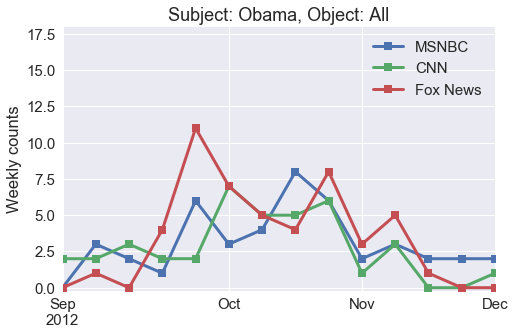

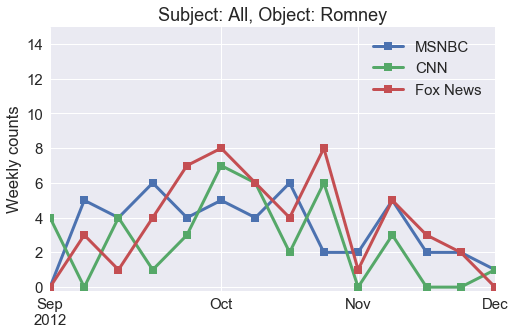

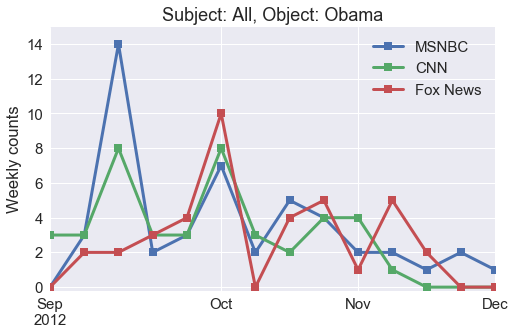

In [8]:
soa_dict = subject_object_analysis(
    viomet_df, subj_obj=[
        ('Romney', 'Obama'),
        ('Obama', 'Romney'),
        ('Romney', None),
        ('Obama', None),
        (None, 'Romney'),
        (None, 'Obama')
    ],    
    date_range=date_range,
    plot=True, save_dir=SAVE_DIR, font_scale=1.5
)

In [ ]:
from projects.common.analysis import daily_metaphor_counts
from projects.viomet.analysis import partition_sums

counts = daily_metaphor_counts(viomet_df, date_range, by=['network'])
sums = partition_sums(counts, partition_infos)

display(sums)

This actually is correct, I'm confident. I want to make some separate scripts for doing these analyses, so I can just do `python partition_sums.py` and it will create some latex tables automatically. 

## Calculation of fit parameters from partition_infos

In [ ]:
from projects.viomet.analysis import partition_info_table
print(partition_info_table(partition_infos))

In [ ]:
from projects.viomet.analysis import partition_sums
from projects.common.analysis import daily_metaphor_counts
import pandas as pd

dates = pd.date_range('2012-9-1', '2012-11-30', freq='D')
cdf = daily_metaphor_counts(viomet_df, dates, by=['network'])
# display(cdf.head())
display(partition_sums(cdf, partition_infos))

In [ ]:
cdf = daily_metaphor_counts(viomet_df, dates, by=['network', 'facet_word'])
sums = partition_sums(cdf, partition_infos)

In [ ]:
# Calculate the excited and ground state frequencies and
# the multiplicative factor to get excited frequency from ground.
# Not sure if this will make it in the pub.
from viomet_9_10_17 import by_facet_word
excited, ground = by_facet_word(
    viomet_df, partition_infos, facet_words=['attack', 'beat', 'hit']
)


from IPython.display import display
print('Excited:')
display(excited)

print('\nGround:')
display(ground)

print('\nExcited - Ground:')
display(excited - ground)